In [46]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy.ma as ma
from matplotlib.colors import ListedColormap
import xarray as xr

In [51]:
data_paths = sorted(glob.glob('C:/Users/taiwoajayi/Documents/Imergnew/merg/*'))

In [52]:
data = []
for i in range(0,len(data_paths)):
    data.append(xr.open_dataset(data_paths[i]))

In [53]:
i=1

In [113]:
lon = data[i].variables['lon'][:]
lat = data[i].variables['lat'][:]
pre = data[i].variables['precipitation'][:].squeeze('time')
pre2 = data[i].variables['precipitationUncal'][:].squeeze('time')

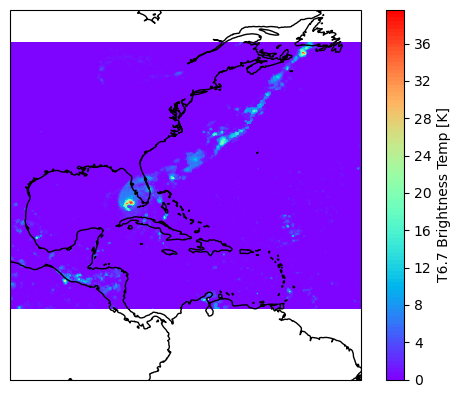

In [55]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-50, -100, 0, 50))
pre = pre.transpose('lat', 'lon')
lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
lon_grid, lat_grid = np.meshgrid(lon, lat)
masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
plt.contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow')# , vmin=-.5, vmax=1.5 nipy_spectral
ax.coastlines()
cbar = plt.colorbar()
cbar.set_label('T6.7 Brightness Temp [K]')
plt.show()

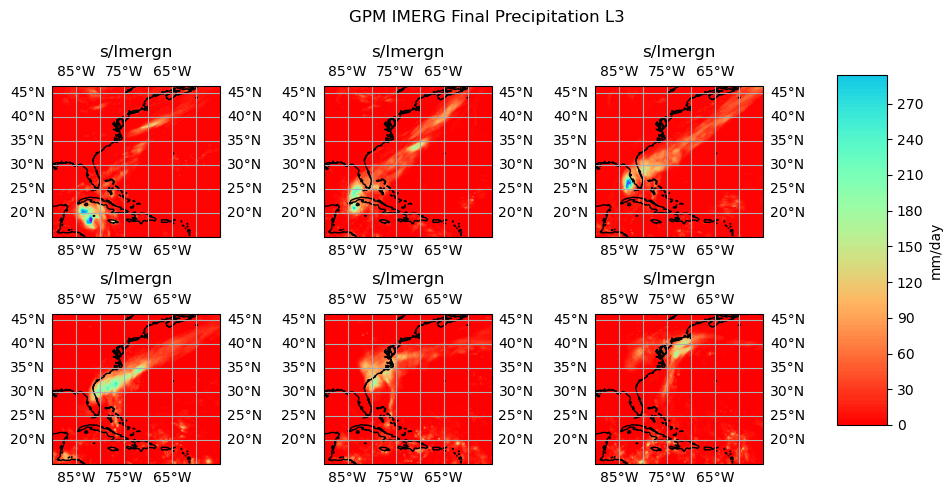

In [20]:
fig,ax = plt.subplots(2, 3, figsize=(10, 5), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(data)):
    lon = data[i].variables['lon'][:]
    lat = data[i].variables['lat'][:]
    pre = data[i].variables['precipitation'][:].squeeze('time')

    ax[x,y].set_extent((-55, -90, 15, 45))
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow_r', vmin=0, vmax=410)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    contours.append(contour)
    ax[x,y].gridlines(draw_labels=True)
    ax[x,y].set_title(data_paths[i][28:36])
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1


fig.suptitle('GPM IMERG Final Precipitation L3')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
#plt.savefig('./figures/1.png', dpi=300)

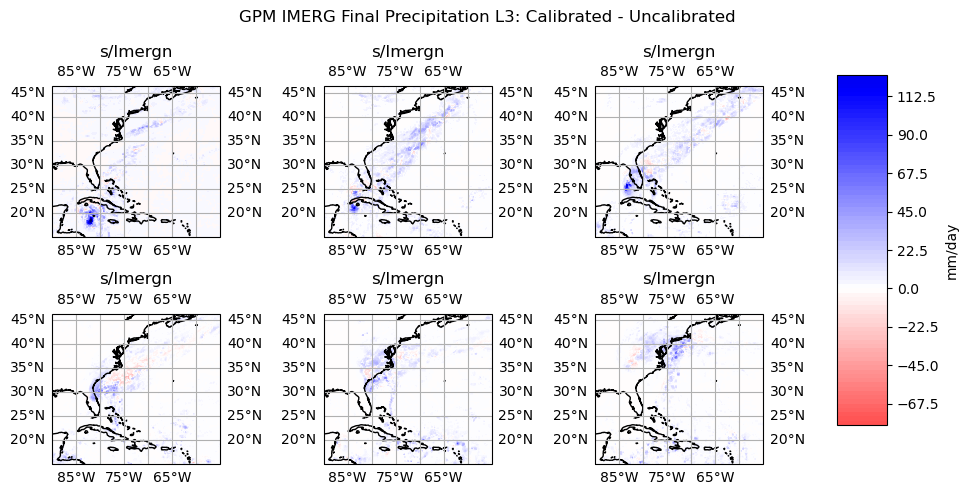

In [21]:
fig,ax = plt.subplots(2, 3, figsize=(10, 5), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(data)):
    lon = data[i].variables['lon'][:]
    lat = data[i].variables['lat'][:]
    pre = data[i].variables['precipitation'][:].squeeze('time') - data[i].variables['MWprecipitation'][:].squeeze('time')

    ax[x,y].set_extent((-55, -90, 15, 45))
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='seismic_r', vmin=-230, vmax=230)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    contours.append(contour)
    ax[x,y].gridlines(draw_labels=True)
    ax[x,y].set_title(data_paths[i][28:36])
    #fig.colorbar(contour)
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1


fig.suptitle('GPM IMERG Final Precipitation L3: Calibrated - Uncalibrated')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
#plt.savefig('./figures/1.png', dpi=300)

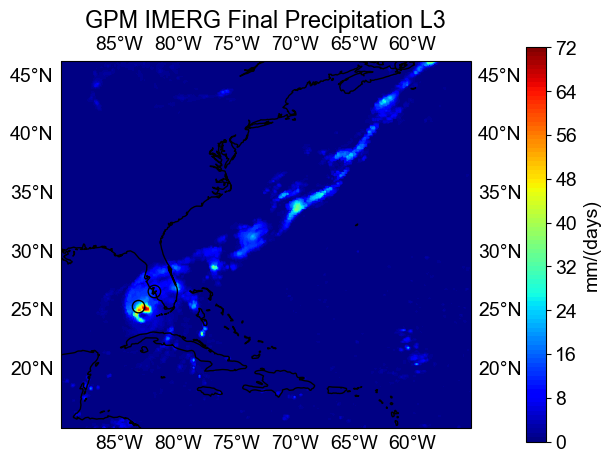

In [144]:
total = xr.concat([data[0], data[1]], dim="time")
pre = total.sum(dim='time')



# Define latitude and longitude bounds
lat_min, lat_max = 10, 50
lon_min, lon_max = -90, -55

# Subset the dataset based on the specified bounds
pre = pre.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)


lon = pre.variables['lon']
lat = pre.variables['lat']


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-55, -90, 15, 45))
pre = pre.transpose('lat', 'lon', ...,)
plt.contourf(lon, lat, pre['precipitation'], 100, transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines()
cbar = plt.colorbar(pad=.1)
cbar.set_label('mm/(days)')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
ax.scatter([-83.35, -82.00], [25.35, 26.64], edgecolor='black', facecolor='none', s=80)  # Captiva, FL
plt.title('GPM IMERG Final Precipitation L3')
plt.tight_layout()

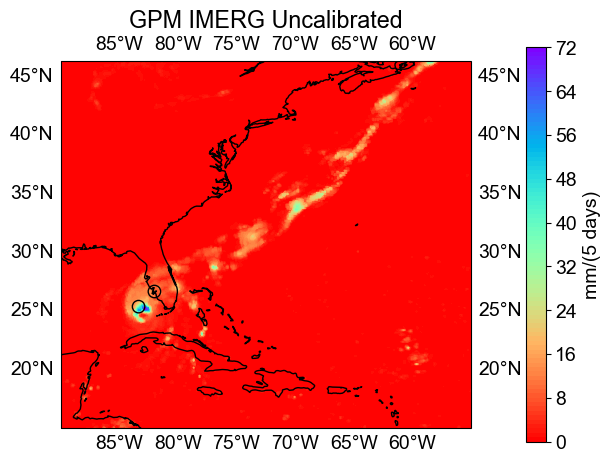

In [142]:
total = xr.concat([data[0], data[1]], dim="time")
pre2 = total.sum(dim='time')



# Define latitude and longitude bounds
lat_min, lat_max = 10, 50
lon_min, lon_max = -90, -55

# Subset the dataset based on the specified bounds
pre = pre.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)


lon = pre2.variables['lon']
lat = pre2.variables['lat']


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-55, -90, 15, 45))
pre = pre2.transpose('lat', 'lon', ...,)
plt.contourf(lon, lat, pre['precipitationUncal'], 100, transform=ccrs.PlateCarree(), cmap='rainbow_r')
ax.coastlines()
cbar = plt.colorbar(pad=.1)
cbar.set_label('mm/(5 days)')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
ax.scatter([-83.35, -82.00], [25.35, 26.64], edgecolor='black', facecolor='none', s=80)  # Captiva, FL
plt.title('GPM IMERG Uncalibrated')
plt.tight_layout()

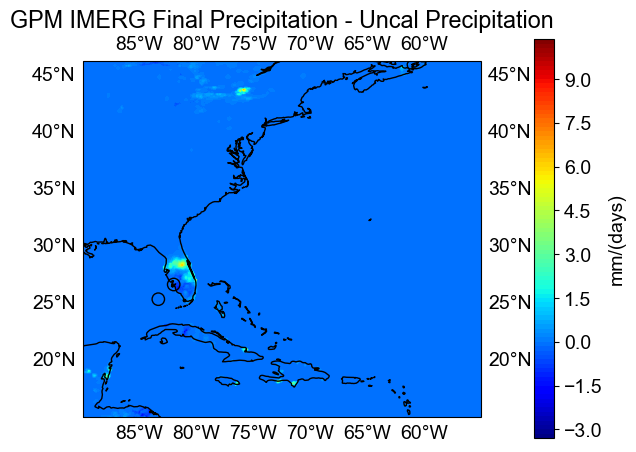

In [135]:
total = xr.concat([data[0], data[1]], dim="time")
pre = total.sum(dim='time')



# Define latitude and longitude bounds
lat_min, lat_max = 10, 50
lon_min, lon_max = -90, -55

# Subset the dataset based on the specified bounds
pre = pre.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)


lon = pre.variables['lon']
lat = pre.variables['lat']


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-55, -90, 15, 45))
pre = pre.transpose('lat', 'lon', ...,)
plt.contourf(lon, lat, pre['precipitation'] - pre['precipitationUncal'], 100, transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines()
cbar = plt.colorbar(pad=.1)
cbar.set_label('mm/(days)')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
ax.scatter([-83.35, -82.00], [25.35, 26.64], edgecolor='black', facecolor='none', s=80)  # Captiva, FL
plt.title('GPM IMERG Final Precipitation - Uncal Precipitation')
plt.tight_layout()

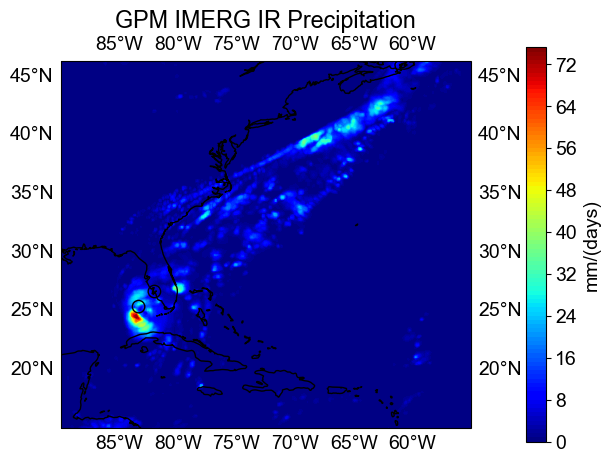

In [140]:
total = xr.concat([data[0], data[1]], dim="time")
pre = total.sum(dim='time')



# Define latitude and longitude bounds
lat_min, lat_max = 10, 50
lon_min, lon_max = -90, -55

# Subset the dataset based on the specified bounds
pre = pre.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)


lon = pre.variables['lon']
lat = pre.variables['lat']


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-55, -90, 15, 45))
pre = pre.transpose('lat', 'lon', ...,)
plt.contourf(lon, lat, pre['IRprecipitation'], 100, transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines()
cbar = plt.colorbar(pad=.1)
cbar.set_label('mm/(days)')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
ax.scatter([-83.35, -82.00], [25.35, 26.64], edgecolor='black', facecolor='none', s=80)  # Captiva, FL
plt.title('GPM IMERG IR Precipitation')
plt.tight_layout()

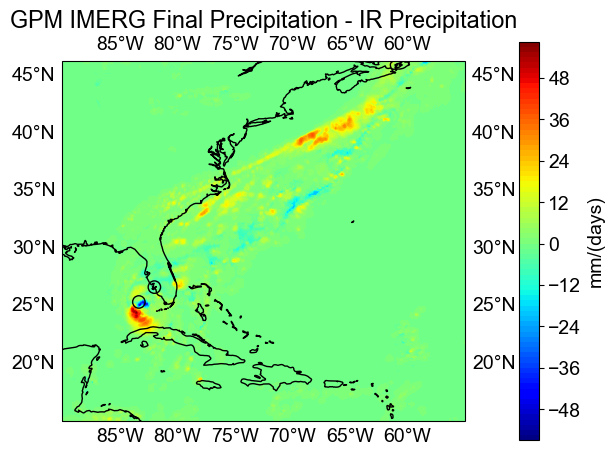

In [137]:
total = xr.concat([data[0], data[1]], dim="time")
pre = total.sum(dim='time')



# Define latitude and longitude bounds
lat_min, lat_max = 10, 50
lon_min, lon_max = -90, -55

# Subset the dataset based on the specified bounds
pre = pre.sel(
    lat=slice(lat_min, lat_max),
    lon=slice(lon_min, lon_max)
)


lon = pre.variables['lon']
lat = pre.variables['lat']


ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-55, -90, 15, 45))
pre = pre.transpose('lat', 'lon', ...,)
plt.contourf(lon, lat, pre['IRprecipitation'] - pre['precipitation'], 100, transform=ccrs.PlateCarree(), cmap='jet')
ax.coastlines()
cbar = plt.colorbar(pad=.1)
cbar.set_label('mm/(days)')
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0, color='gray', alpha=0.5, linestyle='--')
ax.scatter([-83.35, -82.00], [25.35, 26.64], edgecolor='black', facecolor='none', s=80)  # Captiva, FL
plt.title('GPM IMERG Final Precipitation - IR Precipitation')
plt.tight_layout()

In [79]:
pre['precipitation'].shape

(381, 350)

In [80]:
pre[pre['precipitation'].argmax(dim=['lat', 'lon'])]

<xarray.Dataset>
Dimensions:                    (latv: 2, lonv: 2, nv: 2)
Coordinates:
    lat                        float32 25.15
  * latv                       (latv) int32 0 1
    lon                        float32 -82.75
  * lonv                       (lonv) int32 0 1
  * nv                         (nv) int32 0 1
Data variables:
    MWprecipitation            float32 0.0
    MWobservationTime          timedelta64[ns] NaT
    IRprecipitation            float32 16.0
    IRinfluence                float32 0.0
    precipitationUncal         float32 71.74
    precipitationQualityIndex  float32 1.413
    lat_bnds                   (latv) float32 50.2 50.4
    precipitation              float32 71.74
    lon_bnds                   (lonv) float32 -165.6 -165.4

Now let's plot only at the city

In [82]:
total = xr.concat([data[0], data[1]], dim="time")
max_loc = total["precipitation"].sel(lon=-82.00, lat=26.64, method="nearest")

In [148]:
total

<xarray.Dataset>
Dimensions:                    (time: 2, lon: 767, lat: 381, latv: 2, nv: 2,
                                lonv: 2)
Coordinates:
  * lat                        (lat) float32 10.05 10.15 10.25 ... 47.95 48.05
  * latv                       (latv) int32 0 1
  * lon                        (lon) float32 -125.8 -125.8 ... -49.35 -49.25
  * lonv                       (lonv) int32 0 1
  * nv                         (nv) int32 0 1
  * time                       (time) object 2022-09-28 01:30:00 2022-09-28 0...
Data variables:
    MWprecipitation            (time, lon, lat) float32 0.0 0.0 0.0 ... nan nan
    MWobservationTime          (time, lon, lat) timedelta64[ns] 00:09:00 ... NaT
    IRprecipitation            (time, lon, lat) float32 0.0 0.0 0.0 ... 0.0 0.0
    IRinfluence                (time, lon, lat) float32 0.0 0.0 ... 25.0 25.0
    precipitationUncal         (time, lon, lat) float32 0.0 0.0 0.0 ... 0.0 0.0
    precipitationQualityIndex  (time, lon, lat) float32 0.886 0.886 ... 0.564
    lat_bnds                   (time, lat, latv) float32 10.0 10.1 ... 48.0 48.1
    precipitation              (time, lon, lat) float32 0.0 0.0 0.0 ... 0.0 0.0
    time_bnds                  (time, nv) object 2022-09-28 01:30:00 ... 2022...
    lon_bnds                   (time, lon, lonv) float32 -125.9 -125.8 ... -49.2
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-HH/07;\nDOIauth...
    FileInfo:                        DataFormatVersion=7e;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-10-13 02:49:57 GMT Hyrax-1.16.3 htt...

In [83]:
max_loc

<xarray.DataArray 'precipitation' (time: 2)>
array([4.4      , 4.7799997], dtype=float32)
Coordinates:
    lat      float32 26.65
    lon      float32 -82.05
  * time     (time) object 2022-09-28 01:30:00 2022-09-28 02:00:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9
    LongName:          \nComplete merged microwave-infrared (gauge-adjusted)\...
    origname:          precipitation
    fullnamepath:      /Grid/precipitation
    coordinates:       Grid_time Grid_lon Grid_lat

In [104]:
selected_data = pre['precipitation']
selected_data

<xarray.DataArray 'precipitation' (lat: 381, lon: 350)>
array([[0.  , 0.  , 0.09, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.03, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.31, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.26, 0.02, 0.03],
       [0.  , 0.  , 0.  , ..., 0.  , 0.32, 0.  ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 10.05 10.15 10.25 10.35 ... 47.75 47.85 47.95 48.05
  * lon      (lon) float32 -89.95 -89.85 -89.75 -89.65 ... -55.25 -55.15 -55.05

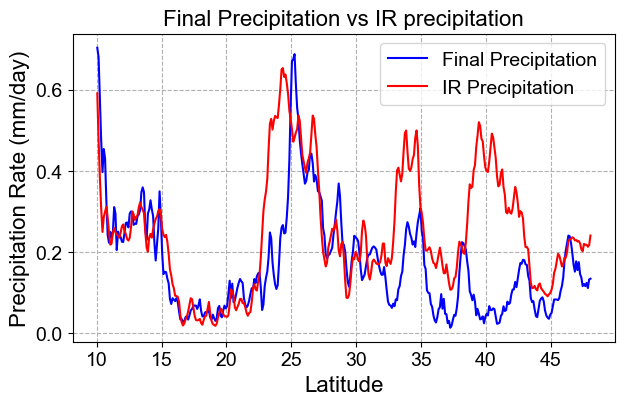

In [157]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Assuming 'total' is your xarray dataset with 'time' in DatetimeJulian format
# and 'precipitation' as a data variable

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

# Select the data within the specified time range
selected_data = total['precipitation']
selected_data2 = total['IRprecipitation']

# Group by every minute and calculate the minute zonal mean along the latitude dimension
minute_zonal_mean = selected_data.groupby('time.minute').mean(dim=['time', 'lon'])
minute_zonal_mean2 = selected_data2.groupby('time.minute').mean(dim=['time', 'lon'])

# Get the latitude values
latitudes = minute_zonal_mean['lat']

# Calculate the annual zonal mean by averaging all minutes
annual_zonal_mean = minute_zonal_mean.mean(dim='minute')
annual_zonal_mean2 = minute_zonal_mean2.mean(dim='minute')

# Plot the annual zonal mean with latitude on the x-axis
plt.figure(figsize=(7, 4))
plt.plot(latitudes, annual_zonal_mean, color='blue', label = 'Final Precipitation')
plt.plot(latitudes, annual_zonal_mean2, color='red', label = 'IR Precipitation')
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Precipitation Rate (mm/day)', fontsize=16)
plt.title('Final Precipitation vs IR precipitation', fontsize=16)
plt.legend()
plt.grid(True, which='major', linestyle='--')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


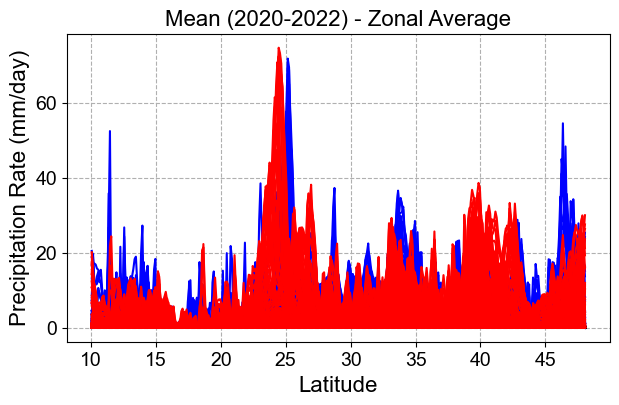

In [147]:
import matplotlib as mpl
mpl.rcParams['font.family']='Arial'
mpl.rcParams['font.size']= 14


# Select the data within the specified time range
selected_data = pre['precipitation']
sel = pre['IRprecipitation']
# Group by month and calculate the monthly zonal mean along the latitude dimension
#monthly_zonal_mean = selected_data.groupby('time.minutes').mean(dim=['time', 'lon'])

# Get the latitude values
latitudes = selected_data['lat']

# Calculate the annual zonal mean by averaging all months
#annual_zonal_mean = monthly_zonal_mean.mean(dim='minutes')

# Plot the annual zonal mean with latitude on the x-axis
plt.figure(figsize=(7, 4))
plt.plot(latitudes, selected_data,color='blue', label = 'Final Precipitation')
plt.plot(latitudes, sel,color='red', label = 'IR Precipitation')
ax.legend()
plt.xlabel('Latitude', fontsize=16)
plt.ylabel('Precipitation Rate (mm/day)', fontsize=16)
plt.title('Mean (2020-2022) - Zonal Average', fontsize=16)
plt.grid(True, which='major',linestyle='--')

plt.show()

In [27]:
max_loc['time'], max_loc.item

(<xarray.DataArray 'time' (time: 6)>
 array(['2022-09-26T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
        '2022-09-28T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
        '2022-09-30T00:00:00.000000000', '2022-10-01T00:00:00.000000000'],
       dtype='datetime64[ns]')
 Coordinates:
     lat      float64 26.65
     lon      float32 -81.95
   * time     (time) datetime64[ns] 2022-09-26 2022-09-27 ... 2022-10-01
 Attributes:
     standard_name:  time
     long_name:      time
     bounds:         time_bnds
     origname:       time
     fullnamepath:   /time,
 <bound method _values_method_wrapper.<locals>.func of <xarray.DataArray 'precipitation' (time: 6)>
 array([  2.5349998,  60.64999  , 116.295    ,   3.8      ,   0.       ,
          0.       ], dtype=float32)
 Coordinates:
     lat      float64 26.65
     lon      float32 -81.95
   * time     (time) datetime64[ns] 2022-09-26 2022-09-27 ... 2022-10-01
 Attributes:
     units:         mm/day
     long_name:     D

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

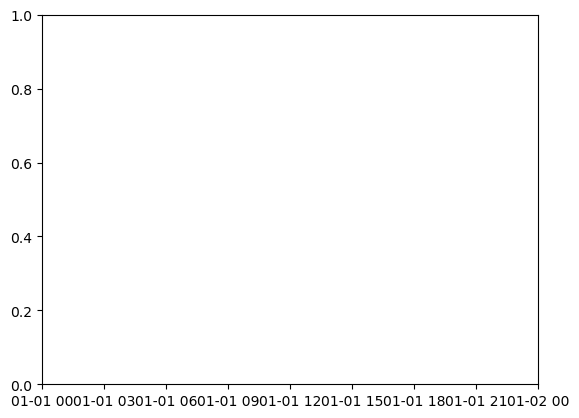

In [28]:
plt.plot(max_loc['time'], max_loc.item)

In [ ]:
data_paths_ir = sorted(glob.glob('./data_ir/*'))
data_ir = []
for i in range(0,len(data_paths_ir)):
    data_ir.append(xr.open_dataset(data_paths_ir[i]))

In [ ]:
data_ir[1].variables['h2o_vap_tot'][:][1,:,:]

<xarray.Variable (lat: 180, lon: 360)>
[64800 values with dtype=float32]
Attributes:
    units:                  kg / m2
    ancillary_variables:    h2o_vap_tot_nobs h2o_vap_tot_sdev
    long_name:              total water vapor
    standard_name:          atmosphere_mass_content_of_water_vapor
    description:            total precipitable water vapor
    AIRS_HDF_name:          totH2OVap
    cell_methods:           area: mean
    coverage_content_type:  physicalMeasurement

NameError: name 'data_ir' is not defined

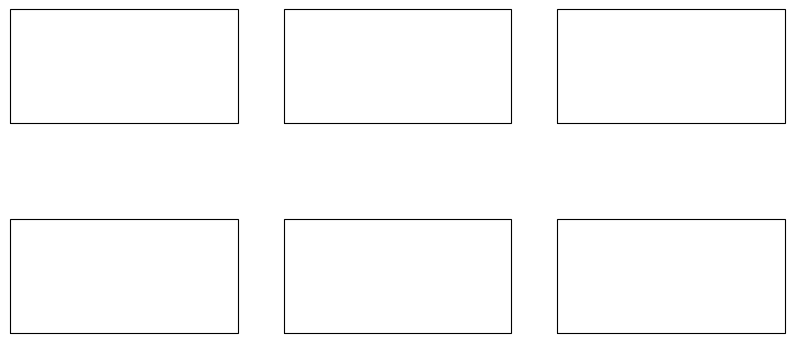

In [29]:
fig,ax = plt.subplots(2, 3, figsize=(10, 5), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(data_ir)):
    lon = data_ir[i].variables['lon'][:]
    lat = data_ir[i].variables['lat'][:]
    pre = data_ir[i].variables['h2o_vap_tot'][:][0,:,:]

    ax[x,y].set_extent((-55, -90, 15, 45))
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow')#, vmin=0, vmax=410)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    fig.colorbar(contour)
    contours.append(contour)
    ax[x,y].gridlines(draw_labels=True)
    ax[x,y].set_title(data_paths[i][28:36])
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1


fig.suptitle('GPM IMERG Early Precipitation L3')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
plt.savefig('./figures/1.png', dpi=300)

Early data

In [ ]:
data_paths_uncal = sorted(glob.glob('./data_late/*'))
data_uncal = []
for i in range(0,len(data_paths_uncal)):
    data_uncal.append(xr.open_dataset(data_paths_uncal[i]))

In [ ]:
data_uncal[0]

<xarray.Dataset>
Dimensions:                    (time: 1, lon: 3600, lat: 1800, nv: 2)
Coordinates:
  * lon                        (lon) float32 -179.9 -179.8 ... 179.9 179.9
  * lat                        (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * time                       (time) object 2022-09-25 00:00:00
Dimensions without coordinates: nv
Data variables:
    precipitationCal           (time, lon, lat) float32 ...
    precipitationCal_cnt       (time, lon, lat) int8 ...
    precipitationCal_cnt_cond  (time, lon, lat) int8 ...
    HQprecipitation            (time, lon, lat) float32 ...
    HQprecipitation_cnt        (time, lon, lat) int8 ...
    HQprecipitation_cnt_cond   (time, lon, lat) int8 ...
    randomError                (time, lon, lat) float32 ...
    randomError_cnt            (time, lon, lat) int8 ...
    time_bnds                  (time, nv) object ...
Attributes:
    BeginDate:       2022-09-25
    BeginTime:       00:00:00.000Z
    EndDate:         2022-09-25
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2022-09-25T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20220925-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2022-09-26T14:45:27.458Z

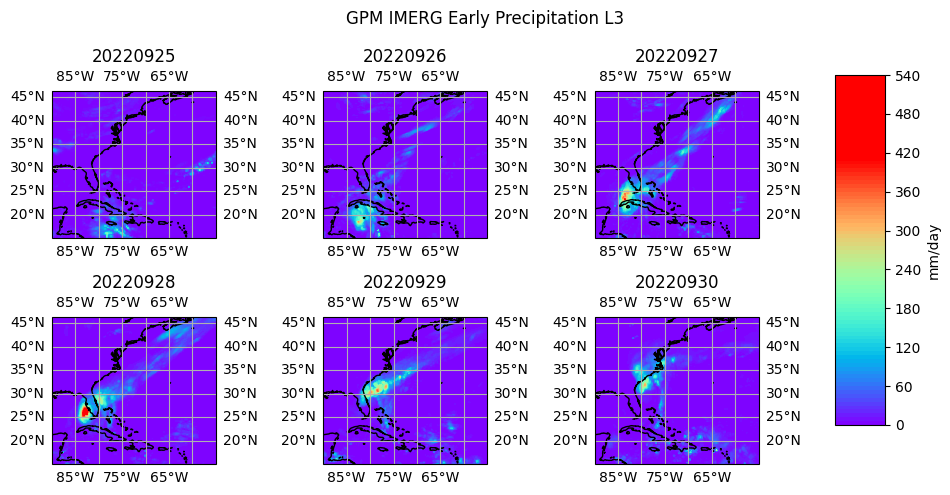

In [ ]:
fig,ax = plt.subplots(2, 3, figsize=(10, 5), sharey='row', sharex='col', subplot_kw={'projection': ccrs.PlateCarree()})
x,y = 0,0
contours = []
for i in range(0,len(data_uncal)):
    lon = data_uncal[i].variables['lon'][:]
    lat = data_uncal[i].variables['lat'][:]
    pre = data_uncal[i].variables['precipitationCal'][:].squeeze('time')

    ax[x,y].set_extent((-55, -90, 15, 45))
    pre = pre.transpose('lat', 'lon')
    lon_min, lon_max, lat_min, lat_max = -100, -50, 0, 60
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    masked_pre = np.ma.masked_where((lon_grid < lon_min) | (lon_grid > lon_max) | (lat_grid < lat_min) | (lat_grid > lat_max),pre)
    contour = ax[x,y].contourf(lon, lat, masked_pre, 100, transform=ccrs.PlateCarree(), cmap='rainbow', vmin=0, vmax=410)# , vmin=-.5, vmax=1.5 nipy_spectral
    ax[x,y].coastlines()
    contours.append(contour)
    ax[x,y].gridlines(draw_labels=True)
    ax[x,y].set_title(data_paths[i][28:36])
    if x == 0 and y < 2:
        y+=1
    elif y == 2:
        x += 1
        y = 0
    elif x ==1:
        y+=1


fig.suptitle('GPM IMERG Early Precipitation L3')
plt.tight_layout()
#fig.subplots_adjust(hspace=-.75)
#fig.colorbar(contours[1], ax=ax[1, :], location='bottom')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(contours[1], cax=cbar_ax)
cbar.set_label('mm/day')
plt.savefig('./figures/1.png', dpi=300)

In [ ]:
data[0]

<xarray.Dataset>
Dimensions:                         (time: 1, lon: 3600, lat: 1800, nv: 2)
Coordinates:
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float64 -89.95 -89.85 ... 89.85 89.95
  * time                            (time) datetime64[ns] 2022-09-25
Dimensions without coordinates: nv
Data variables:
    precipitation                   (time, lon, lat) float32 ...
    precipitation_cnt               (time, lon, lat) int8 ...
    precipitation_cnt_cond          (time, lon, lat) int8 ...
    MWprecipitation                 (time, lon, lat) float32 ...
    MWprecipitation_cnt             (time, lon, lat) int8 ...
    MWprecipitation_cnt_cond        (time, lon, lat) int8 ...
    randomError                     (time, lon, lat) float32 ...
    randomError_cnt                 (time, lon, lat) int8 ...
    probabilityLiquidPrecipitation  (time, lon, lat) int8 ...
    time_bnds                       (time, nv) datetime64[ns] ...
Attributes:
    BeginDate:       2022-09-25
    BeginTime:       00:00:00.000Z
    EndDate:         2022-09-25
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2022-09-25T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR.MS.MRG.3IMERG.20220925-S000000-E002959.0000.V07A....
    title:           GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 ...
    DOI:             10.5067/GPM/IMERGDF/DAY/07
    ProductionTime:  2023-08-23T18:51:35.565Z